In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov8:: 100%|██████████| 9962/9962 [00:01<00:00, 6792.81it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO

In [5]:
import ultralytics
print(ultralytics.__version__)

8.3.109


In [6]:
from ultralytics import YOLO

# Load YOLOv8s model
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 38.9MB/s]


In [7]:
from ultralytics import YOLO

results = model.train(
    data="/content/emergency_dataset-4/data.yaml",
    imgsz=640,
    epochs=40,
    save_period=1,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/emergency_dataset-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 81.0MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 374MB/s]


AMP: checks passed ✅


train: Scanning /content/emergency_dataset-4/train/labels... 3486 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3486/3486 [00:02<00:00, 1447.33it/s]


train: New cache created: /content/emergency_dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2984, len(boxes) = 4288. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/emergency_dataset-4/valid/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<00:00, 1108.50it/s]

val: New cache created: /content/emergency_dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.94G      1.395      2.171      1.774         44        640: 100%|██████████| 218/218 [00:23<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.26it/s]

                   all        993       1242      0.547       0.51      0.484       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      4.74G      1.404      1.856      1.779         63        640: 100%|██████████| 218/218 [00:21<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.69it/s]


                   all        993       1242      0.427       0.51      0.469      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.77G       1.44      1.873      1.813         37        640: 100%|██████████| 218/218 [00:20<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.73it/s]


                   all        993       1242      0.472      0.469      0.392      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      4.81G      1.415      1.796      1.784         53        640: 100%|██████████| 218/218 [00:20<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.72it/s]

                   all        993       1242      0.594      0.585      0.571      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      4.84G      1.371      1.726       1.75         51        640: 100%|██████████| 218/218 [00:20<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.64it/s]

                   all        993       1242      0.608      0.579      0.592      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      4.88G      1.324      1.645      1.716         42        640: 100%|██████████| 218/218 [00:20<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.68it/s]

                   all        993       1242      0.634      0.671      0.665      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      4.92G      1.305      1.582      1.693         42        640: 100%|██████████| 218/218 [00:20<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.73it/s]

                   all        993       1242      0.629      0.699      0.698      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.95G      1.268      1.537      1.655         38        640: 100%|██████████| 218/218 [00:20<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.88it/s]

                   all        993       1242       0.64      0.768      0.744      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.99G      1.253      1.469      1.641         61        640: 100%|██████████| 218/218 [00:20<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.74it/s]

                   all        993       1242      0.652      0.754      0.749      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      5.03G      1.237      1.458      1.643         40        640: 100%|██████████| 218/218 [00:20<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.73it/s]

                   all        993       1242      0.758      0.725      0.786       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      5.06G      1.201      1.413      1.612         54        640: 100%|██████████| 218/218 [00:20<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.66it/s]

                   all        993       1242      0.635        0.8      0.773      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       5.1G      1.213      1.375      1.611         40        640: 100%|██████████| 218/218 [00:20<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.62it/s]

                   all        993       1242      0.817      0.711      0.814      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      5.13G      1.199      1.376      1.603         43        640: 100%|██████████| 218/218 [00:20<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.62it/s]

                   all        993       1242      0.797      0.774      0.836      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      5.17G      1.175      1.313      1.585         55        640: 100%|██████████| 218/218 [00:20<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.69it/s]

                   all        993       1242      0.836      0.757      0.847      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      5.21G      1.161      1.289      1.575         56        640: 100%|██████████| 218/218 [00:20<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.74it/s]

                   all        993       1242      0.789      0.778      0.847      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      5.24G      1.154      1.295      1.569         52        640: 100%|██████████| 218/218 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.68it/s]

                   all        993       1242      0.811      0.762      0.852      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      5.28G      1.132      1.266      1.558         52        640: 100%|██████████| 218/218 [00:20<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.86it/s]

                   all        993       1242      0.868      0.788      0.885      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      5.32G      1.136      1.239      1.563         58        640: 100%|██████████| 218/218 [00:20<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.82it/s]

                   all        993       1242      0.846      0.845      0.887      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      5.35G      1.123      1.211       1.55         53        640: 100%|██████████| 218/218 [00:20<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.59it/s]

                   all        993       1242      0.861      0.819      0.886      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      5.39G       1.13      1.189      1.543         44        640: 100%|██████████| 218/218 [00:20<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.80it/s]

                   all        993       1242      0.865      0.812      0.892      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      5.42G      1.101       1.16      1.518         45        640: 100%|██████████| 218/218 [00:20<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.59it/s]

                   all        993       1242      0.871      0.825      0.903      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      5.46G      1.095      1.147      1.516         47        640: 100%|██████████| 218/218 [00:20<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.93it/s]

                   all        993       1242      0.891      0.825      0.914       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       5.5G      1.091      1.145      1.515         53        640: 100%|██████████| 218/218 [00:20<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.71it/s]

                   all        993       1242      0.871       0.83      0.908      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      5.53G      1.084      1.128      1.506         49        640: 100%|██████████| 218/218 [00:20<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.69it/s]

                   all        993       1242      0.872      0.885      0.921      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      5.57G      1.072      1.108      1.501         41        640: 100%|██████████| 218/218 [00:20<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.53it/s]

                   all        993       1242      0.861      0.876      0.924      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      5.61G       1.08      1.114      1.508         42        640: 100%|██████████| 218/218 [00:20<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.60it/s]

                   all        993       1242      0.913      0.838      0.922      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      5.64G       1.05       1.06      1.483         55        640: 100%|██████████| 218/218 [00:20<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.88it/s]

                   all        993       1242      0.886      0.845      0.918      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      5.68G      1.055      1.068      1.485         47        640: 100%|██████████| 218/218 [00:20<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.62it/s]

                   all        993       1242       0.88      0.875      0.926       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      5.71G      1.052      1.054      1.481         32        640: 100%|██████████| 218/218 [00:20<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.89it/s]

                   all        993       1242      0.938      0.842       0.93      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      5.75G      1.045      1.043      1.473         60        640: 100%|██████████| 218/218 [00:20<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.54it/s]

                   all        993       1242      0.877      0.876      0.927      0.656


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      5.79G     0.8277     0.6907      1.436         16        640: 100%|██████████| 218/218 [00:20<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.64it/s]

                   all        993       1242       0.89      0.897      0.942      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      5.82G     0.8052     0.6274      1.418         18        640: 100%|██████████| 218/218 [00:20<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.53it/s]

                   all        993       1242      0.906      0.882      0.932      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      5.86G     0.7976     0.5991       1.41         17        640: 100%|██████████| 218/218 [00:20<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.43it/s]

                   all        993       1242       0.92      0.891      0.942      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       5.9G     0.7833     0.5761      1.393         16        640: 100%|██████████| 218/218 [00:20<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.86it/s]

                   all        993       1242      0.913       0.89      0.943      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      5.94G     0.7562     0.5415       1.37         17        640: 100%|██████████| 218/218 [00:19<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.77it/s]

                   all        993       1242      0.932      0.885      0.945      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      5.97G     0.7471     0.5403      1.361         18        640: 100%|██████████| 218/218 [00:19<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.81it/s]

                   all        993       1242      0.943      0.875      0.944        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         6G     0.7391      0.513      1.352         14        640: 100%|██████████| 218/218 [00:19<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.86it/s]

                   all        993       1242      0.927      0.865      0.938      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      6.04G     0.7288     0.4896      1.343         18        640: 100%|██████████| 218/218 [00:19<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.48it/s]

                   all        993       1242      0.928       0.89      0.944      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      6.08G     0.7201     0.4804      1.332         16        640: 100%|██████████| 218/218 [00:19<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.69it/s]

                   all        993       1242      0.925      0.899      0.945      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      6.11G     0.7098     0.4662      1.323         15        640: 100%|██████████| 218/218 [00:20<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.84it/s]

                   all        993       1242      0.942      0.891      0.949      0.715



40 epochs completed in 0.284 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]


                   all        993       1242      0.942      0.892      0.949      0.715
          AmbulanceOff        462        568      0.946        0.9      0.947      0.713
           AmbulanceOn         74         74      0.941      0.905      0.974      0.823
         FireEngineOff        266        300      0.951      0.841      0.929      0.608
          FireEngineOn         53         61      0.917      0.902      0.927      0.717
             PoliceCar        186        239      0.954      0.912      0.967      0.714
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [8]:
# Evaluate the model after training
metrics = model.val()

print(f"mAP@0.5       : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95  : {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/emergency_dataset-4/valid/labels.cache... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.58it/s]


                   all        993       1242      0.941      0.895      0.949      0.715
          AmbulanceOff        462        568      0.945        0.9      0.947      0.712
           AmbulanceOn         74         74      0.938      0.905      0.974      0.822
         FireEngineOff        266        300      0.951      0.842      0.929      0.608
          FireEngineOn         53         61      0.918      0.916      0.927      0.717
             PoliceCar        186        239      0.953      0.912      0.967      0.713
Speed: 0.4ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
mAP@0.5       : 0.9491
mAP@0.5:0.95  : 0.7147
Precision     : 0.9455
Recall        : 0.8996


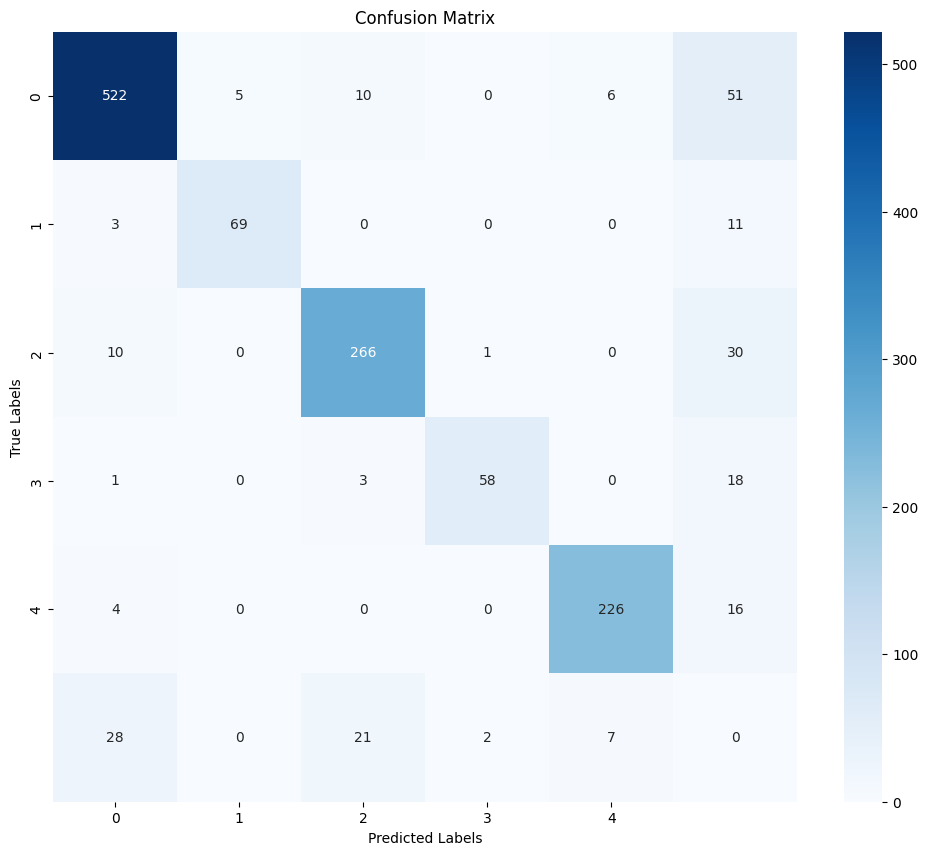

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix
class_names = metrics.names

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   32.7363         1.39478         2.17094         1.77437   
1      2   58.8863         1.40435         1.85642         1.77875   
2      3   84.4130         1.44047         1.87345         1.81286   
3      4  109.7990         1.41451         1.79594         1.78448   
4      5  135.2290         1.37116         1.72609         1.75002   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.54650            0.51018           0.48366   
1               0.42654            0.51031           0.46876   
2               0.47192            0.46862           0.39217   
3               0.59435            0.58522           0.57140   
4               0.60824            0.57903           0.59164   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.24972       1.67020       1.70868       2.32723  0.000369   
1              0.21209       1.90922  

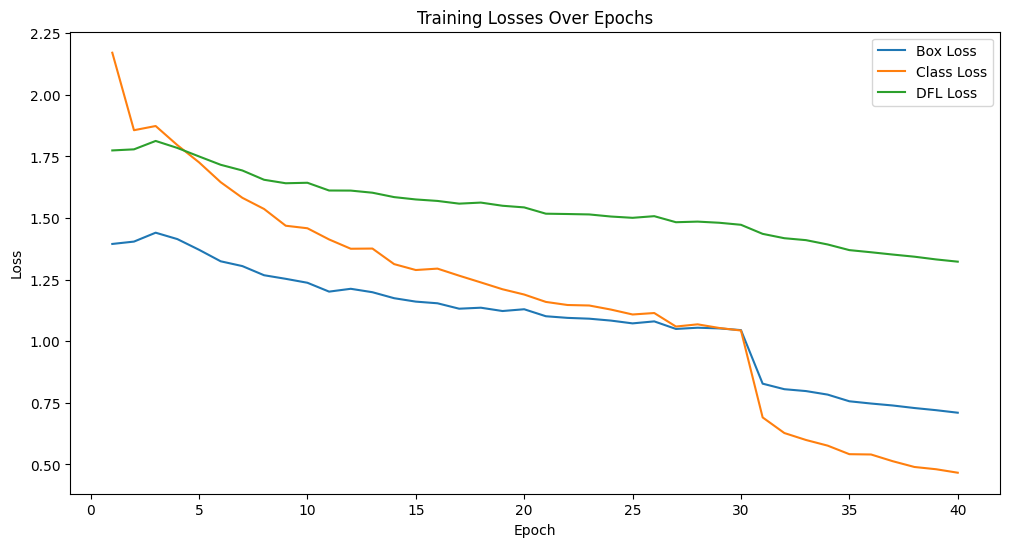

In [28]:
#Detailed Training Metrics

import pandas as pd
results_path = '/content/runs/detect/train/results.csv'
df_results = pd.read_csv(results_path)

print(df_results.head())

plt.figure(figsize=(12, 6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Box Loss')
plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Class Loss')
plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()
#Accurately fetches and visualizes logged training metrics.

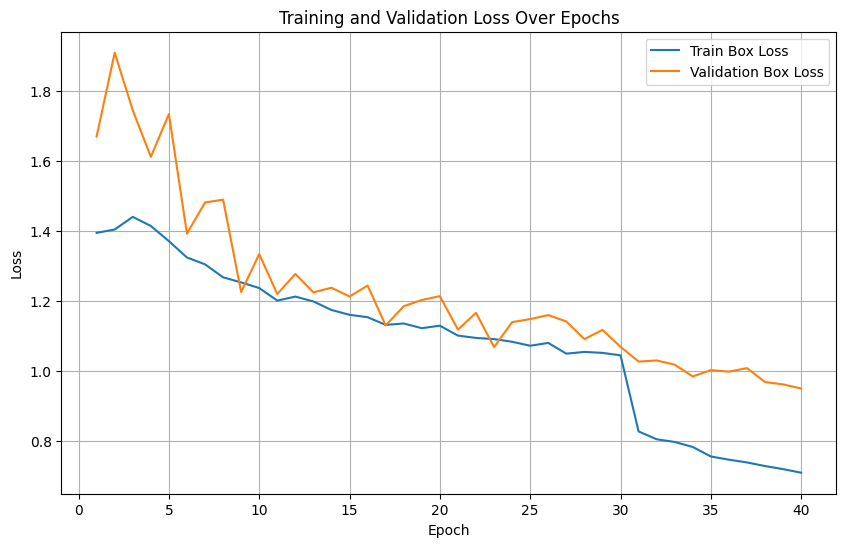

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

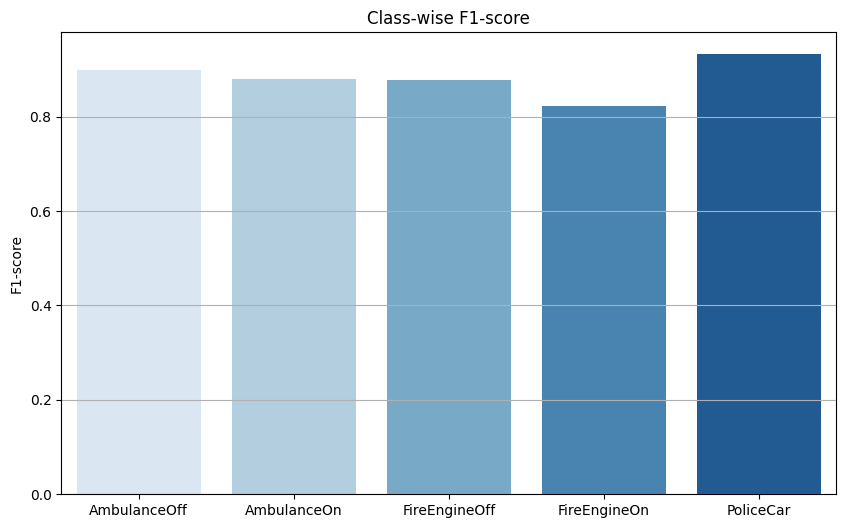

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion matrix from YOLO metrics
cm = metrics.confusion_matrix.matrix

# Manually define your class names (must match your confusion matrix exactly!)
class_names = ['AmbulanceOff', 'AmbulanceOn', 'FireEngineOff', 'FireEngineOn', 'PoliceCar']

# Expand confusion matrix correctly into y_true and y_pred
y_true = []
y_pred = []

for true_label, row in enumerate(cm):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * int(count))
        y_pred.extend([pred_label] * int(count))

# Ensure labels match exactly
labels = list(range(len(class_names)))

# Generate the classification report
report = classification_report(y_true, y_pred, labels=labels, target_names=class_names, output_dict=True)

# Extract F1-scores from report
f1_scores = [report[cls]['f1-score'] for cls in class_names]

# Plot F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=f1_scores, palette="Blues")
plt.ylabel('F1-score')
plt.title('Class-wise F1-score')
plt.grid(axis='y')
plt.show()


In [13]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

img_path = '/content/emergency_dataset-4/train/images'

model.predict(source=img_path, save=True)

results = model(img_path)

Streaming output truncated to the last 5000 lines.
image 1988/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.4de7cd24f11f559b5b232aaf2666a777.jpg: 640x640 8 PoliceCars, 7.9ms
image 1989/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.61fad1183e40d06503f6a04a8f9e1435.jpg: 640x640 7 PoliceCars, 8.5ms
image 1990/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.820094567cc7158c73a2de5d290b47c0.jpg: 640x640 (no detections), 8.0ms
image 1991/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.a3eace24d55681cdcf41c158a3841135.jpg: 640x640 (no detections), 8.1ms
image 1992/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.96f3d19e5c215836be055150dd85f6b2.jpg: 640x640 3 AmbulanceOffs, 8.4ms
image 1993/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.c245bc155ccd7a5d6444b2f0fe9489c2.jpg: 640x640 3 AmbulanceOffs, 8.2ms
image 1994/3486 /content/emergency_dataset-4/train/images/PZYKE4UOBEDG_jp

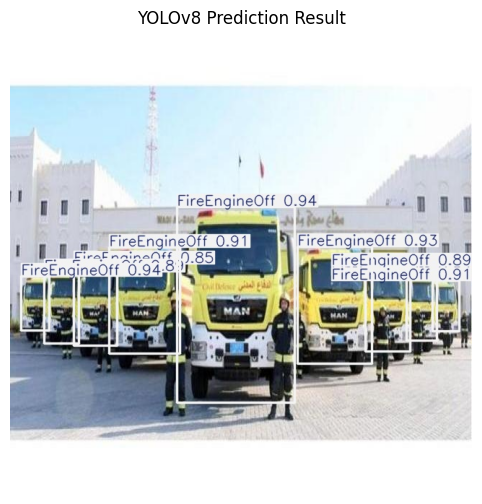

In [26]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import glob

# Define the predicted images folder
predicted_images_path = "/content/runs/detect/predict/"

# Get predicted image from the folder
predicted_images = glob.glob(predicted_images_path + "*.jpg")

if predicted_images:
    image_path = predicted_images[40]

    try:
        img = PILImage.open(image_path)

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title("YOLOv8 Prediction Result")
        plt.show()

    except Exception as e:
        print(f"Error opening {image_path}: {e}")
else:
    print("No predicted images found in the folder.")

In [27]:
#Final Summary
print("Summary of YOLOv8 Experiment 1")
print("Model Used: YOLOv8s (Small)")
print(f"Final mAP@0.5: {metrics.box.map50:.4f}")
print(f"Final mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Summary of YOLOv8 Experiment 1
Model Used: YOLOv8s (Small)
Final mAP@0.5: 0.9491
Final mAP@0.5:0.95: 0.7147
Precision     : 0.9455
Recall        : 0.8996
